In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import os
from PIL import Image

In [29]:
imagePaths = 'Dataset_daun/'
label_list = ['Nangka', 'Pepaya']
data = []
labels = []

In [30]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'/*.jpg'):
        print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

Dataset_daun//Nangka\001.jpg
Dataset_daun//Nangka\002.jpg
Dataset_daun//Nangka\003.jpg
Dataset_daun//Nangka\004.jpg
Dataset_daun//Nangka\005.jpg
Dataset_daun//Nangka\006.jpg
Dataset_daun//Nangka\007.jpg
Dataset_daun//Nangka\008.jpg
Dataset_daun//Nangka\009.jpg
Dataset_daun//Nangka\010.jpg
Dataset_daun//Nangka\011.jpg
Dataset_daun//Nangka\012.jpg
Dataset_daun//Nangka\013.jpg
Dataset_daun//Nangka\014.jpg
Dataset_daun//Nangka\015.jpg
Dataset_daun//Nangka\016.jpg
Dataset_daun//Nangka\017.jpg
Dataset_daun//Nangka\018.jpg
Dataset_daun//Nangka\019.jpg
Dataset_daun//Nangka\020.jpg
Dataset_daun//Nangka\021.jpg
Dataset_daun//Nangka\022.jpg
Dataset_daun//Nangka\023.jpg
Dataset_daun//Nangka\024.jpg
Dataset_daun//Nangka\025.jpg
Dataset_daun//Nangka\026.jpg
Dataset_daun//Nangka\027.jpg
Dataset_daun//Nangka\028.jpg
Dataset_daun//Nangka\029.jpg
Dataset_daun//Nangka\030.jpg
Dataset_daun//Nangka\031.jpg
Dataset_daun//Nangka\032.jpg
Dataset_daun//Nangka\033.jpg
Dataset_daun//Nangka\034.jpg
Dataset_daun//

In [31]:
np.array(data).shape

(340, 32, 32, 3)

In [32]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [33]:
print(labels)

['Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nang

In [34]:
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]


In [35]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (272, 32, 32, 3)
Ukuran data test = (68, 32, 32, 3)


In [36]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 4,197,377
Trainable params: 4,197,377
Non-trainable params: 0
_________________________________________________________________


In [37]:
# tentukan hyperparameter
lr = 0.01
max_epochs = 20
opt_funct = SGD(learning_rate=lr)

In [38]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

### Melatih Model ANN dengan Data Train

In [39]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/20
9/9 [==============================] - 1s 54ms/step - loss: 0.8721 - accuracy: 0.5368 - val_loss: 0.6536 - val_accuracy: 0.6324
Epoch 2/20
9/9 [==============================] - 0s 29ms/step - loss: 0.6181 - accuracy: 0.6250 - val_loss: 0.7485 - val_accuracy: 0.5294
Epoch 3/20
9/9 [==============================] - 0s 28ms/step - loss: 0.5424 - accuracy: 0.6912 - val_loss: 0.5348 - val_accuracy: 0.6912
Epoch 4/20
9/9 [==============================] - 0s 24ms/step - loss: 0.4574 - accuracy: 0.8125 - val_loss: 0.7657 - val_accuracy: 0.5147
Epoch 5/20
9/9 [==============================] - 0s 18ms/step - loss: 0.5184 - accuracy: 0.7279 - val_loss: 0.5104 - val_accuracy: 0.6912
Epoch 6/20
9/9 [==============================] - 0s 22ms/step - loss: 0.4024 - accuracy: 0.8419 - val_loss: 0.4602 - val_accuracy: 0.8088
Epoch 7/20
9/9 [==============================] - 0s 20ms/step - loss: 0.4962 - accuracy: 0.7243 - val_loss: 0.4943 - val_accuracy: 0.7941
Epoch 8/20
9/9 [===========

### Evaluasi Model

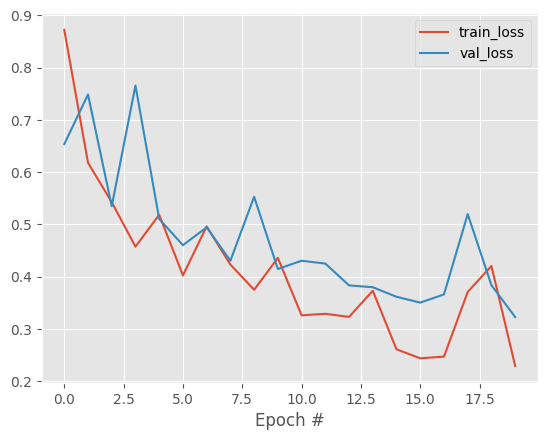

In [40]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

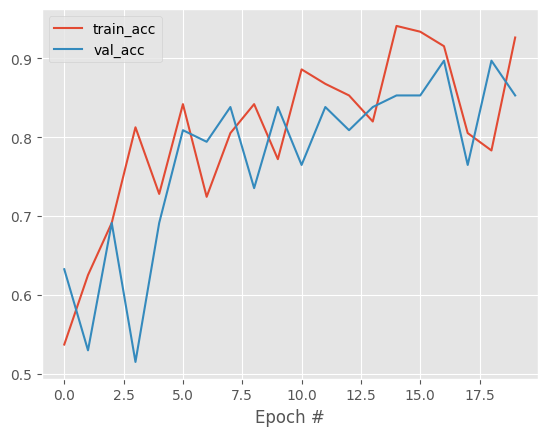

In [41]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

In [42]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(int)
print(classification_report(y_test, target, target_names=label_list))

3/3 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

      Nangka       0.84      0.89      0.86        36
      Pepaya       0.87      0.81      0.84        32

    accuracy                           0.85        68
   macro avg       0.85      0.85      0.85        68
weighted avg       0.85      0.85      0.85        68



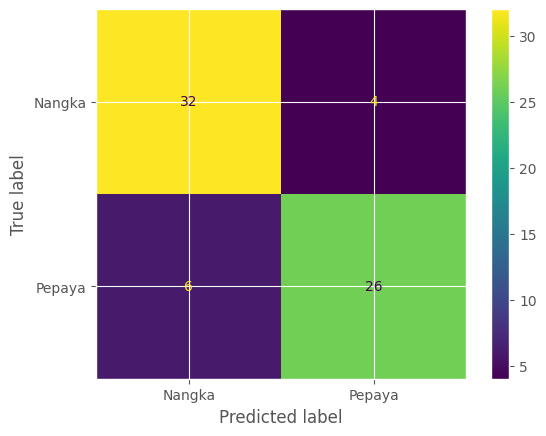

In [43]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, target)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = label_list)

cm_display.plot()
plt.show()